In [64]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D 

from tensorflow.keras import models, layers
import tensorflow.keras as keras

In [8]:
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
from google.colab import drive

# Чтение данных

In [10]:
# Создаем объект для токенизапции
tokenizer = Tokenizer(    num_words=10000)
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt

--2021-12-19 11:44:17--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2021-12-19 11:44:17 (86.0 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [11]:
data = open('/tmp/sonnets.txt').read()
#Читаем текст
corpus = data.lower().split("\n")

In [12]:
tokenizer.fit_on_texts( corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [17]:
callback = EarlyStopping(monitor='val_loss', mode='max', patience=30) # создаем обратный вызов - calback - тут "Ранний останов"

# Построение моделей

In [19]:
model_1 = Sequential()
model_1.add(Embedding(total_words, 256, input_length=max_sequence_len-1))  # вложение тренируемое для перехода от слова к его векторному коду 
# на вход вложения (эмбединга) передаем вектор словарь (длина равна словарю, вектор разреженный)), на выход строим вектор из n (тут 256) координат - он плотный
#model.add(Bidirectional(LSTM(50, return_sequences = True)))

model_1.add(LSTM(128))
model_1.add(Dropout( 0.2))
model_1.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_1.add(Dense(total_words, activation='softmax'))
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model_1.summary())

In [129]:
hist_1 = model_1.fit(predictors, label, epochs=20, validation_split=0.2, callbacks=[callback],verbose=0)

In [130]:
model_2 = Sequential()
model_2.add(Embedding(total_words, 256, input_length=max_sequence_len-1))  # вложение тренируемое для перехода от слова к его векторному коду 
# на вход вложения (эмбединга) передаем вектор словарь (длина равна словарю, вектор разреженный)), на выход строим вектор из n (тут 256) координат - он плотный
#model.add(Bidirectional(LSTM(50, return_sequences = True)))

model_2.add(LSTM(128))
model_2.add(Dropout( 0.2))
model_2.add(Dense(total_words/16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_2.add(Dense(total_words/8, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_2.add(Dense(total_words/4, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_2.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_2.add(Dense(total_words, activation='softmax'))
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model_1.summary())

hist_2 = model_2.fit(predictors, label, epochs=20, validation_split=0.2, callbacks=[callback],verbose=0)

In [131]:
model_3 = Sequential()
model_3.add(Embedding(total_words, 256, input_length=max_sequence_len-1))  # вложение тренируемое для перехода от слова к его векторному коду 
# на вход вложения (эмбединга) передаем вектор словарь (длина равна словарю, вектор разреженный)), на выход строим вектор из n (тут 256) координат - он плотный
#model.add(Bidirectional(LSTM(50, return_sequences = True)))

model_3.add(LSTM(256))
model_3.add(Dropout( 0.2))
model_3.add(Dense(total_words/16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_3.add(Dense(total_words/8, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_3.add(Dense(total_words/4, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_3.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_3.add(Dense(total_words, activation='softmax'))
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model_1.summary())

hist_3 = model_3.fit(predictors, label, epochs=20, validation_split=0.2, callbacks=[callback],verbose=0)

In [ ]:
model_4 = Sequential()
model_4.add(Embedding(total_words, 256, input_length=max_sequence_len-1))  # вложение тренируемое для перехода от слова к его векторному коду 
# на вход вложения (эмбединга) передаем вектор словарь (длина равна словарю, вектор разреженный)), на выход строим вектор из n (тут 256) координат - он плотный
#model.add(Bidirectional(LSTM(50, return_sequences = True)))

model_4.add(LSTM(256))
model_4.add(Dropout( 0.2))
model_4.add(Dense(total_words/4, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_4.add(Dense(total_words/4, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_4.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_4.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_4.add(Dense(total_words, activation='softmax'))
model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model_1.summary())

hist_4 = model_4.fit(predictors, label, epochs=20, validation_split=0.2, callbacks=[callback],verbose=0)

In [ ]:
model_5 = Sequential()
model_5.add(Embedding(total_words, 256, input_length=max_sequence_len-1))  # вложение тренируемое для перехода от слова к его векторному коду 
# на вход вложения (эмбединга) передаем вектор словарь (длина равна словарю, вектор разреженный)), на выход строим вектор из n (тут 256) координат - он плотный
#model.add(Bidirectional(LSTM(50, return_sequences = True)))

model_5.add(LSTM(256))
model_5.add(Dropout( 0.2))
model_5.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model_5.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model_5.add(Dense(total_words, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model_5.add(Dense(total_words, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model_5.add(Dense(total_words, activation='softmax'))
model_5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model_1.summary())

hist_5 = model_5.fit(predictors, label, epochs=20, validation_split=0.2, callbacks=[callback],verbose=0)

In [ ]:
model_6 = Sequential()
model_6.add(Embedding(total_words, 256, input_length=max_sequence_len-1))  # вложение тренируемое для перехода от слова к его векторному коду 
# на вход вложения (эмбединга) передаем вектор словарь (длина равна словарю, вектор разреженный)), на выход строим вектор из n (тут 256) координат - он плотный
#model.add(Bidirectional(LSTM(50, return_sequences = True)))

model_6.add(LSTM(256))
model_6.add(Dropout( 0.3))
model_6.add(Dense(total_words/8, activation='relu', kernel_regularizer=regularizers.l2(0.000001)))
model_6.add(Dense(total_words/4, activation='relu', kernel_regularizer=regularizers.l2(0.000001)))
model_6.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.000001)))
model_6.add(Dense(total_words, activation='relu', kernel_regularizer=regularizers.l2(0.000001)))
model_6.add(Dense(total_words, activation='softmax'))
model_6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model_1.summary())

hist_6 = model_6.fit(predictors, label, epochs=20, validation_split=0.2, callbacks=[callback],verbose=0)

In [ ]:
model_7 = Sequential()

model_7.add(Embedding(total_words, 512, input_length=max_sequence_len-1))  # вложение тренируемое для перехода от слова к его векторному коду 
# на вход вложения (эмбединга) передаем вектор словарь (длина равна словарю, вектор разреженный)), на выход строим вектор из n (тут 256) координат - он плотный
#model.add(Bidirectional(LSTM(50, return_sequences = True)))

model_7.add(LSTM(128))
# model_7.add(Dropout(0.0001))
model_7.add(Dense(total_words/8, activation='relu', kernel_regularizer=regularizers.l2(0.0000000001)))
# model_7.add(Dropout(0.2))
model_7.add(Dense(total_words, activation='relu'))
model_7.add(Dense(total_words, activation='softmax'))
model_7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model_1.summary())

hist_7 = model_7.fit(predictors, label, epochs=20, validation_split=0.2, callbacks=[callback],verbose=0)

In [ ]:
model_8 = Sequential()

model_8.add(Embedding(total_words, 512, input_length=max_sequence_len-1))  # вложение тренируемое для перехода от слова к его векторному коду 
# на вход вложения (эмбединга) передаем вектор словарь (длина равна словарю, вектор разреженный)), на выход строим вектор из n (тут 256) координат - он плотный
#model.add(Bidirectional(LSTM(50, return_sequences = True)))

model_8.add(LSTM(128))
# model_7.add(Dropout(0.2))
model_8.add(Dense(total_words/8, activation='relu', kernel_regularizer=regularizers.l2(0.0000000001)))
model_8.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# model_8.add(Dropout(0.2))
model_8.add(Dense(total_words, activation='relu'))
model_8.add(Dense(total_words, activation='softmax'))
model_8.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model_1.summary())

hist_8 = model_8.fit(predictors, label, epochs=20, validation_split=0.2, callbacks=[callback],verbose=0)

# Графики метрик

In [113]:
import matplotlib.pyplot as plt

def plot_acc_graph(history, model_name):
  acc = history.history['accuracy']
  acc_v = history.history['val_accuracy']
  loss = history.history['loss']
  loss_v = history.history['val_loss']

  epochs = range(len(acc))
  
  plt.plot(epochs, acc, 'b', label='Train')
  plt.plot(epochs, acc_v, 'r', label='Test')
  plt.legend()
  plt.title('accuracy for ' + model_name)
  
  plt.figure()
  
  plt.plot(epochs, loss, 'b', label='Train')
  plt.plot(epochs, loss_v, 'r', label='Test')
  plt.title('loss for ' + model_name)
  plt.legend()
  
  plt.show()

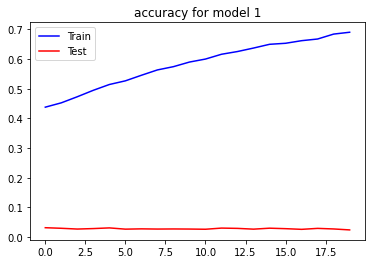

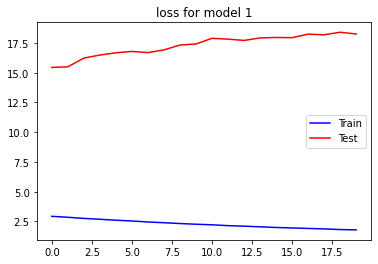

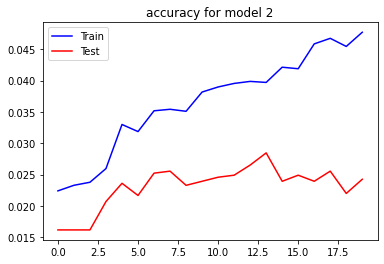

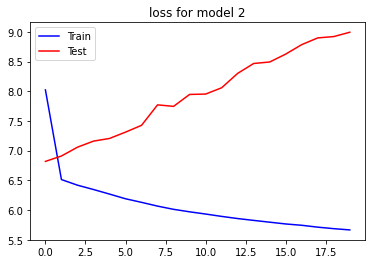

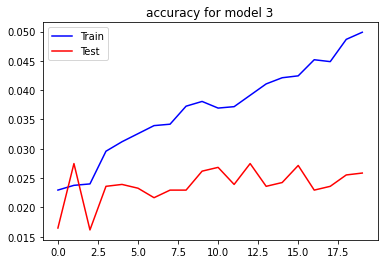

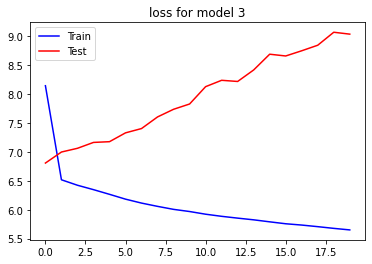

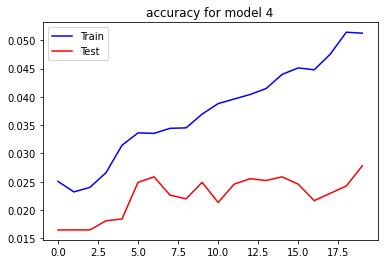

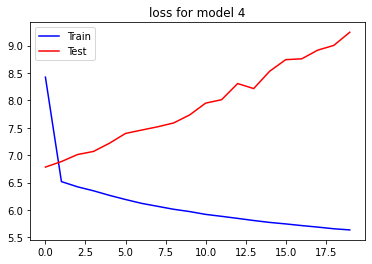

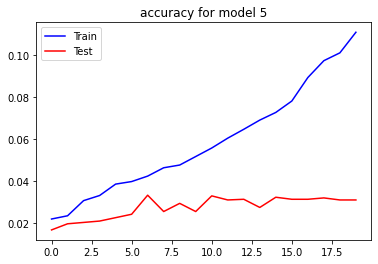

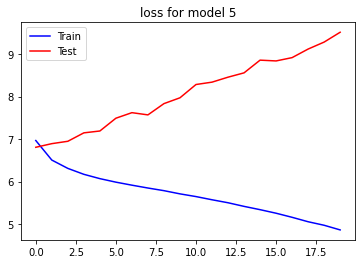

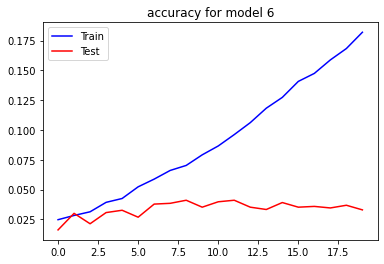

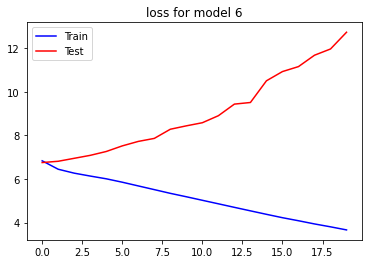

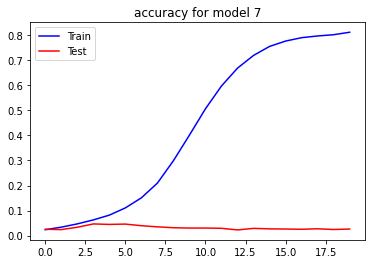

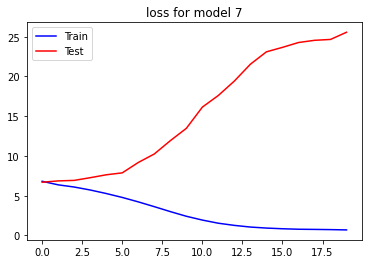

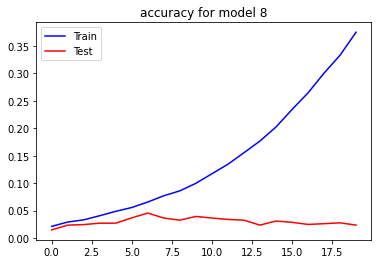

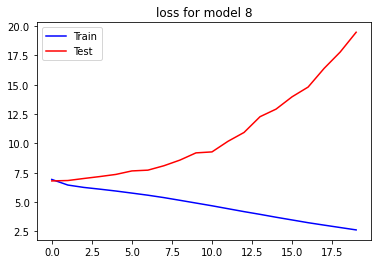

In [114]:
i=1
for h in [hist_1, hist_2, hist_3, hist_4, hist_5, hist_6, hist_7, hist_8]:
  n = 'model ' + str(i)
  plot_acc_graph(h, n)
  i+=1

# Результат генерации текста моделями

In [121]:
# # начальная строка
# seed_text = "Help me Obi Wan Kenobi, you're my only hope"
# #seed_text = "She is my girl, I see in"
# next_words = 15
# строим последовательность + новое предсказание  
def new_phrase(model, seed_text='What can I say ', next_words=15):
  for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    # print(token_list)
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    #predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    y_p=model.predict(token_list)
    y_predict = y_p * np.random.random(  size = (1,y_p.shape[1]))
    predicted_ind = np.argmax(y_predict,axis = 1)
    for word, index in tokenizer.word_index.items():
      if index == predicted_ind:
        output_word = word
        break
    seed_text += " " + output_word
  return seed_text

In [128]:
tokens=[]
new_texts=[]
for m in [model_1, model_3, model_5, model_7, model_8]:
  result=new_phrase(m, "I want to say ", 10)
  # tokens.append(result[0])
  new_texts.append(result)

# y_p_1=model_1.predict(tokens[0])
# y_p_3=model_1.predict(tokens[1])
# y_p_5=model_1.predict(tokens[2])
# y_p_7=model_1.predict(tokens[3])
# y_p_8=model_1.predict(tokens[4])

models_number = [1,3,5,7,8]

for i in range(5):
  print('Phrase', 'generated by model №', models_number[i])
  print(new_texts[i])

Phrase generated by model № 1
I want to say  that in your love acquainted survey ' ' parts that
Phrase generated by model № 3
I want to say  of be love thou love be love be art thou
Phrase generated by model № 5
I want to say  to live thou art for with too days in live
Phrase generated by model № 7
I want to say  his chief desire dost deceive light lie hid in words
Phrase generated by model № 8
I want to say  this change thou shouldst in his brow show down her


# Вывод

Для достижения наилучшей точности, при добавлении слоёв, необходимо следить за параметром регуляризации и частью выборки, на которой обучается слой. Добаление слоёв без поиска оптимальных параметров не только не даёт улучшение, оно ухудшает результат.

Модель, давшая наилучший результат по метрикам (модель №7), чаще остальных давала связный текст пр генерации, что говорит о том, что она действительно лучше остальных научилась искать связи между словами. 